In [66]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold  
from sklearn.feature_selection import SelectPercentile, f_regression
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
pd.set_option("max_rows",200)
train = pd.read_csv("../data/processed/train.csv")
train.pop("id")
target = train.pop("血糖")

In [68]:
train_x= train.as_matrix()
train_y = target.as_matrix()

In [69]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'mse'},
    'num_leaves': 31,
    'learning_rate': 0.01,
    'lambda_l1': 1,
    'lambda_l2': 1,
    'cat_smooth': 10,
    'feature_fraction': 0.5,
    'bagging_fraction':0.5,
    'bagging_freq': 5,
    'verbose': 0
}
lgb_train = lgb.Dataset(train_x, train_y, feature_name=train.columns.tolist())
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500)

In [70]:
feature_importance =  gbm.feature_importance()

In [71]:
features = pd.DataFrame({"columns":train.columns.tolist(),"importance":feature_importance})

In [72]:
features = features.sort_values(by=['importance'],ascending=False)

In [73]:
features

,columns,importance
11,甘油三酯,683
2,age,682
27,红细胞平均体积,551
15,尿素,539
17,尿酸,524
5,*碱性磷酸酶,512
3,*天门冬氨酸氨基转换酶,463
23,白细胞计数,444
6,*r-谷氨酰基转换酶,436
28,红细胞平均血红蛋白浓度,434


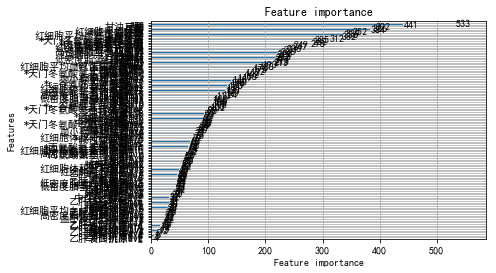

In [51]:
def plt_encoding_error():
    # coding:utf-8
    import matplotlib
    # matplotlib.use('qt4agg')
    # 指定默认字体
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['font.family'] = 'sans-serif'
    # 解决负号'-'显示为方块的问题
    matplotlib.rcParams['axes.unicode_minus'] = False
plt_encoding_error()

lgb.plot_importance(gbm)
plt.show()